# Time Series Analysis: Tutorial 4

## Import packages

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rc('text', usetex=True)
import pandas as pd
import statsmodels.api as sm

# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

## Simulate White Noise

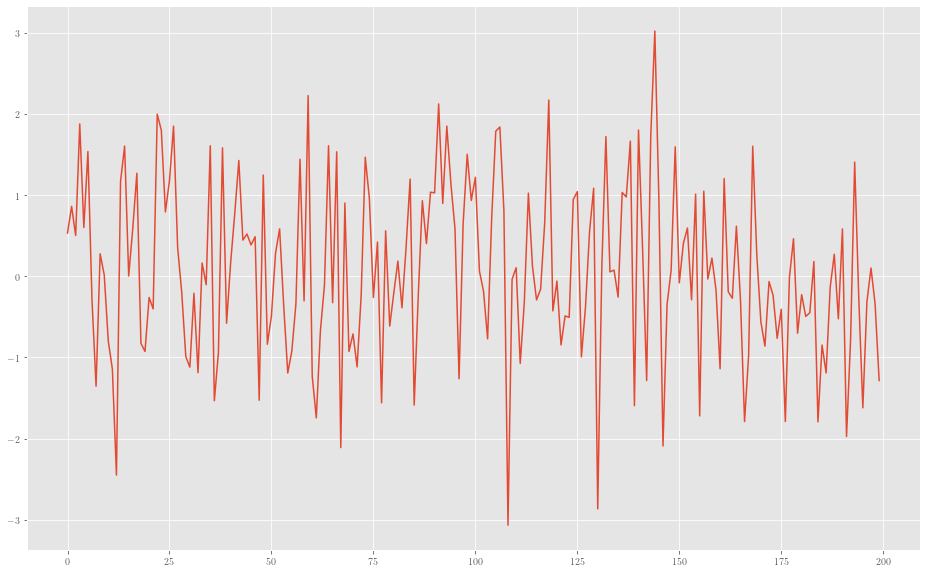

In [11]:
# Simulate the White Noise 
ar1 = np.array([1])
ma1 = np.array([1])
WN_object1 = ArmaProcess(ar1, ma1)
simulated_data_0 = WN_object1.generate_sample(nsample=200)
# ... and plot it
fig = plt.figure(figsize=(16,10))
fig = plt.plot(simulated_data_0)

### Autocorrelation of the Simulated White Noise

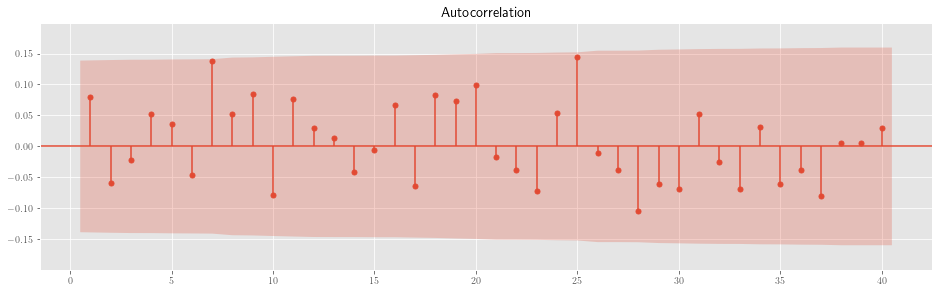

In [12]:
# calculate the ACF of the White Noise
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(simulated_data_0.squeeze(), lags=40, ax=ax1, zero=False, auto_ylims=True)

## Simulate the MA Processes

In [13]:
# Simulate the MA Processes
# 1. MA(1) with parameter -0.8
ar1 = np.array([1])
ma1 = np.array([1,0.8])             # Note that the sign here has the opposite direction
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=200)

# 2. MA(2) with parameter -0.6 and 0.3
ma2 = np.array([1, 0.6, -0.3])
MA_object2 = ArmaProcess(ar1, ma2)
simulated_data_2 = MA_object2.generate_sample(nsample=200)

# If you browse the help page of the ARMA package you can infer how the process is being defined: 

![title](ARMA-Python-notes.png)

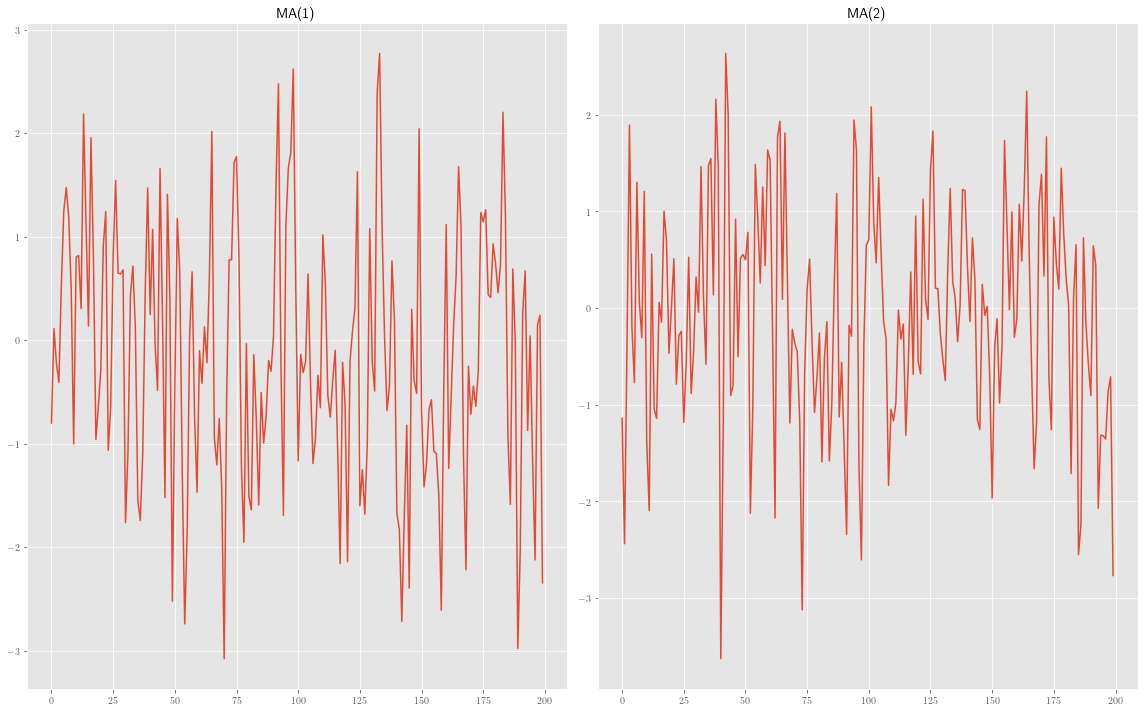

In [14]:
# Plot the resulting time series
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 10))
axes[0].plot(simulated_data_1)
axes[0].set_title('MA(1)')
axes[1].plot(simulated_data_2)
axes[1].set_title('MA(2)')
fig.tight_layout()

### Autocorrelation of the simulated MA(1) process

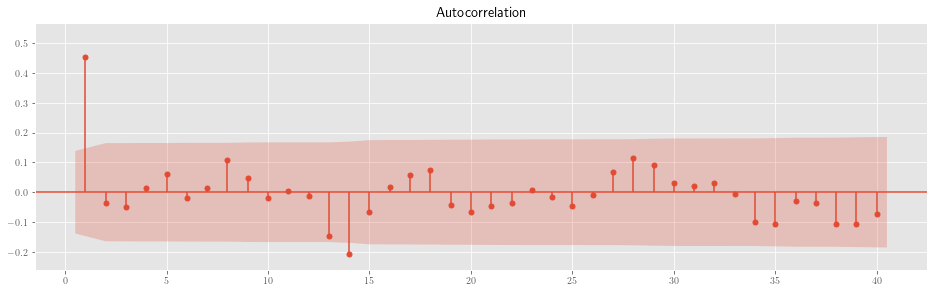

In [9]:
# calculate the ACFs (AR(1))
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(simulated_data_1.squeeze(), lags=40, ax=ax1, zero=False, auto_ylims=True)

### Autocorrelation of the simulated MA(2) process

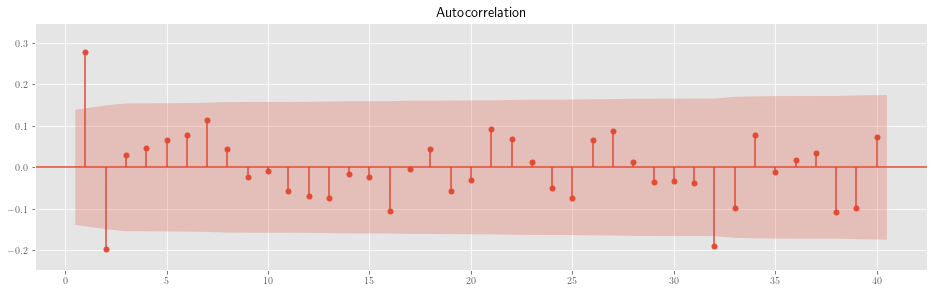

In [11]:
### Autocorrelation of the simulated MA(1) process# calculate the ACFs (AR(2))
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(simulated_data_2.squeeze(), lags=40, ax=ax1, zero=False, auto_ylims=True)

## Simulate the AR Processes

In [31]:
# Simulate the AR Processes
# 1. AR(1) with parameter +0.9
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=2000)

# 1. AR(2) with parameter +0.9 and -0.75
ar2 = np.array([1, -0.9, 0.75])
AR_object2 = ArmaProcess(ar2, ma1)
simulated_data_2 = AR_object2.generate_sample(nsample=2000)

### Stationarity of the AR process (and necessity of "burn-in")
The AR(1) (and higher order AR processes) are only stationary under two conditions. 

1. The absolute value of the AR(1) parameter must be (strictly) smaller than one, i.e. $|\psi_1|<1$ (the conditions become more complex for higher order AR processes). 

However, also under this condition, the AR process is not necessarily stationary. In order to see this, consider the $MA(\infty)$ representation of the AR(1) process (at which we arrive by iteratively "going through" the first order difference equations that the AR(1) model implies): 

$y_t=\psi_1^t y_0+(\psi_1^{t-1}+\psi_1^{t-2}+...+\psi_1+1)\delta+\sum_{j=1}^t\psi^{t-j}\epsilon_j$, where: \
$E[y_t]=\psi_1^t y_0 + (\psi_1^{t-1}+\psi_1^{t-2}+...+\psi_1+1)\delta)$ \
$E[y_{t+s}]=\psi_1^{t+s} y_0 + (\psi_1^{t+s-1}+\psi_1^{t+s-2}+...+\psi_1^{t-1}+...+\psi_1+1)\delta)$,

and hence:
$E[y_t] \neq E[y_{t+s}]$, i.e. the process is not stationary if $t$ is "small".

To ensure stationarity one additional condition is therefore needed, which is called the "stochastic initial condition": 

2. We assume that the process has started a long time ago.

Here, in the simulation we "throw away" the first 90% of the observations, in order to look at $lim_{t \rightarrow \infty} y_t = \delta/(1-\psi_1)+\sum_{j=0}^\infty \psi_1^j \epsilon_{t-j}$. 

When looking at the limit, the initial value $y_0$ is in any case very far away and will not matter anymore, since it's relevance decays exponentially ($\psi_1$ is raised to the power of $t$). It then holds that $E[y_t]=E[y_{t+s}]=\delta/(1-\psi_1)$ everywhere. 

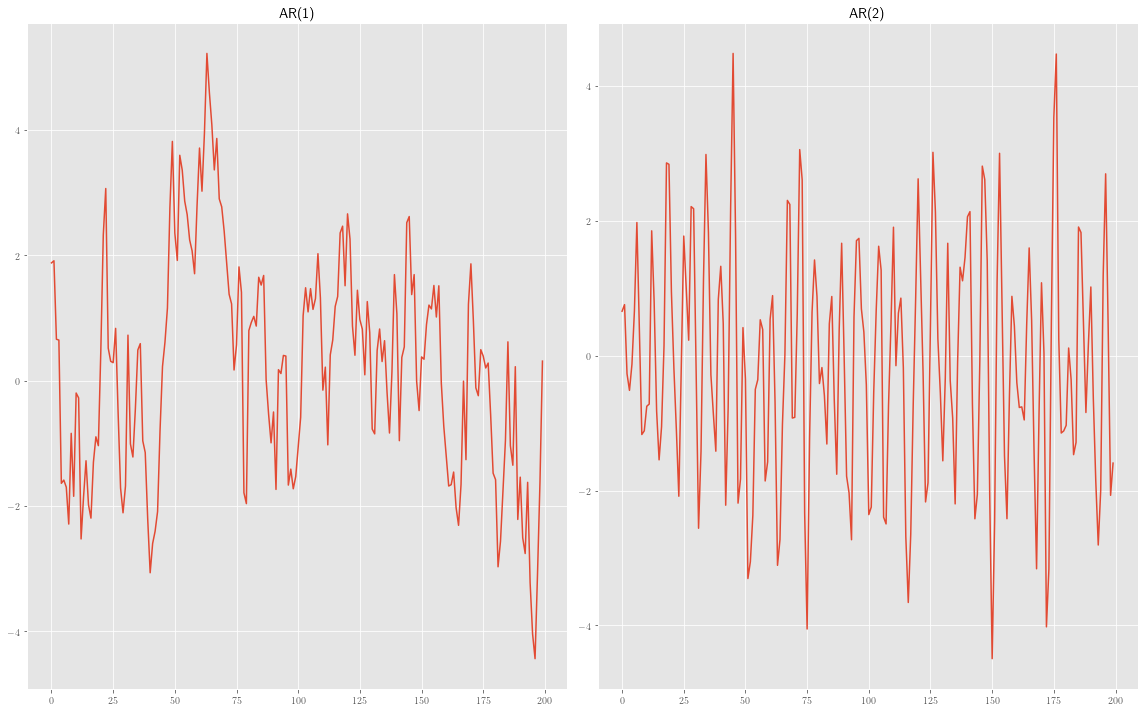

In [17]:
# Plot the resulting time series
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 10))
axes[0].plot(simulated_data_1[1800:])
axes[0].set_title('AR(1)')
axes[1].plot(simulated_data_2[1800:])
axes[1].set_title('AR(2)')## Simulate the AR Processes
fig.tight_layout()

### Autocorrelation of the AR(1) Process

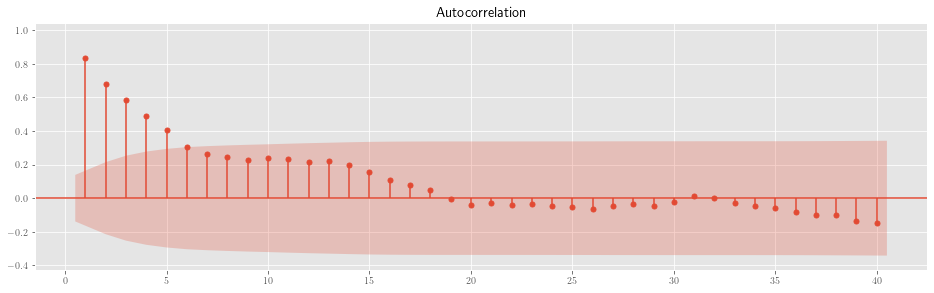

In [15]:
# calculate the ACFs (AR(1))
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(simulated_data_1[1800:].squeeze(), lags=40, ax=ax1, zero=False, auto_ylims=True)

### Autocorrelation of the AR(2) Process

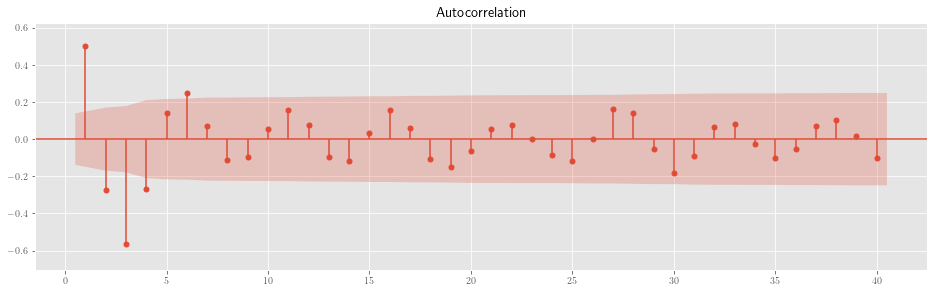

In [16]:
# calculate the ACFs (AR(2))
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(simulated_data_2[1800:].squeeze(), lags=40, ax=ax1, zero=False, auto_ylims=True)